In [2]:
# Célula 1: Setup Completo do Ambiente e Carregamento de Recursos (Execute esta primeiro!)

import sys
import os
import pandas as pd
import json
import time # Importando time aqui também
import numpy as np
import matplotlib.pyplot as plt

# Adiciona a raiz do projeto ao Path para encontrar a pasta 'src'
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

# Importa todas as suas classes de estrutura de dados
from src.estrutura_de_dados.lista_encadeada import LinkedList
from src.estrutura_de_dados.lista_encadeada_otimizada import LinkedListOptimized
from src.estrutura_de_dados.tabela_hash import HashTable
from src.estrutura_de_dados.arvore_avl import AVLTree
from src.estrutura_de_dados.cuckoo_hashing import CuckooHashing
from src.estrutura_de_dados.bloom_filter2 import CountingBloomFilter
from src.estrutura_de_dados.kd_tree import KDTree
# --- CORREÇÃO DEFINITIVA: Adiciona o método à classe importada ---
def get_ll_memory_usage(self):
    """Soma o tamanho do objeto da lista mais o tamanho de cada nó."""
    if not self.head: return 0
    size = sys.getsizeof(self)
    node = self.head
    while node:
        size += sys.getsizeof(node)
        node = node.next
    return size

# Atribui a função como um método da classe
LinkedListOptimized.get_memory_usage = get_ll_memory_usage
print("✅ Método 'get_memory_usage' adicionado dinamicamente à LinkedListOptimized.")
# -------------------------------------------------------------------

# Define e popula a variável de cache
RECURSOS_CARREGADOS = {"df": None}

def carregar_dataframe():
    """Função simplificada para carregar o DataFrame para o cache."""
    if RECURSOS_CARREGADOS["df"] is None:
        try:
            # Caminho relativo a partir da pasta 'notebooks'
            path_df = "../dataset/heart_attack_prediction_dataset.csv"
            RECURSOS_CARREGADOS["df"] = pd.read_csv(path_df)
            print("✅ DataFrame carregado com sucesso!")
        except FileNotFoundError:
            print("❌ ERRO: Arquivo do dataset não encontrado.")
            return False
    return True

# Executa o carregamento
carregar_dataframe()

✅ Método 'get_memory_usage' adicionado dinamicamente à LinkedListOptimized.
✅ DataFrame carregado com sucesso!


True

In [3]:
# Célula 2: Populando as estruturas
# Vamos usar o índice da linha como chave e um valor da linha como valor
import time
import os
# ... outros imports se precisar ...

# --- 1. Configuração do Benchmark ---
N_ITEMS = 5000 
print(f"--- Iniciando Benchmark Completo com {N_ITEMS} Itens ---")

# A linha abaixo agora funciona, pois RECURSOS_CARREGADOS foi definido na célula anterior
df = RECURSOS_CARREGADOS["df"] 

NOME_DA_COLUNA = df.columns[0] 
NUM_ITENS_PARA_TESTE = 5000 # Use um número grande, como 5000 ou mais

print(f"Populando as estruturas com {NUM_ITENS_PARA_TESTE} itens...")

# Popula a Lista Encadeada
linked_list = LinkedList()
for i in range(NUM_ITENS_PARA_TESTE):
    # A lista encadeada só guarda o valor
    linked_list.insert(df[NOME_DA_COLUNA].iloc[i])

# Popula a Tabela Hash
hash_table = HashTable(size=NUM_ITENS_PARA_TESTE * 2) # Um bom tamanho é ~2x o número de itens
for i in range(NUM_ITENS_PARA_TESTE):
    # A tabela hash guarda a chave (índice) e o valor
    hash_table.insert(key=i, value=df[NOME_DA_COLUNA].iloc[i])

avl_tree = AVLTree()
for i in range(NUM_ITENS_PARA_TESTE):
    # A árvore armazena chaves únicas para busca
    # Usaremos os valores da coluna como chaves
    avl_tree.insert(df[NOME_DA_COLUNA].iloc[i])

print("Estruturas populadas!")

# Vamos escolher um item para buscar que esteja no final da lista
# Isso vai expor o pior caso da lista encadeada
chave_para_buscar = NUM_ITENS_PARA_TESTE - 1
valor_para_buscar = df[NOME_DA_COLUNA].iloc[chave_para_buscar]

print(f"Item escolhido para o teste de busca: Chave={chave_para_buscar}, Valor='{valor_para_buscar}'")

--- Iniciando Benchmark Completo com 5000 Itens ---
Populando as estruturas com 5000 itens...
Estruturas populadas!
Item escolhido para o teste de busca: Chave=4999, Valor='AQX7767'


In [4]:
# Célula 3: O Benchmark!

# --- Teste de Busca na Lista Encadeada ---
print("Iniciando busca na Lista Encadeada...")
start_time_ll = time.perf_counter()
resultado_ll = linked_list.search(valor_para_buscar)
end_time_ll = time.perf_counter()
tempo_ll = end_time_ll - start_time_ll
print(f"Resultado: {resultado_ll}. Tempo gasto: {tempo_ll:.8f} segundos.")

# --- Teste de Busca na Tabela Hash ---
print("\nIniciando busca na Tabela Hash...")
start_time_ht = time.perf_counter()
resultado_ht = hash_table.search(chave_para_buscar)
end_time_ht = time.perf_counter()
tempo_ht = end_time_ht - start_time_ht
print(f"Resultado: {resultado_ht}. Tempo gasto: {tempo_ht:.8f} segundos.")

# --- Teste de Busca na Árvore AVL ---
print("\nIniciando busca na Árvore AVL...")
start_time_avl = time.perf_counter()
resultado_avl = avl_tree.search(valor_para_buscar)
end_time_avl = time.perf_counter()
tempo_avl = end_time_avl - start_time_avl
print(f"Resultado: {resultado_avl}. Tempo gasto: {tempo_avl:.8f} segundos.")

# --- Comparação ---
print("\n--- COMPARAÇÃO ---")
if tempo_ht > 0:
    diferenca = tempo_ll / tempo_ht
    print(f"A busca na Tabela Hash foi aproximadamente {diferenca:.2f} vezes mais rápida que na Lista Encadeada.")
else:
    print("A busca na Tabela Hash foi praticamente instantânea!")

Iniciando busca na Lista Encadeada...
Resultado: True. Tempo gasto: 0.00023270 segundos.

Iniciando busca na Tabela Hash...
Resultado: AQX7767. Tempo gasto: 0.00003680 segundos.

Iniciando busca na Árvore AVL...
Resultado: True. Tempo gasto: 0.00003690 segundos.

--- COMPARAÇÃO ---
A busca na Tabela Hash foi aproximadamente 6.32 vezes mais rápida que na Lista Encadeada.


In [5]:
# Célula 4: Benchmark de Inserção

NUM_ITENS_PARA_TESTE = 5000 # O mesmo número de antes
NOME_DA_COLUNA = df.columns[0]

# --- Teste de Inserção na Lista Encadeada ---
print("Iniciando teste de inserção na Lista Encadeada...")
ll_para_insercao = LinkedList() # Começa com uma lista vazia
start_time_ll_insert = time.perf_counter()

for i in range(NUM_ITENS_PARA_TESTE):
    ll_para_insercao.insert(df[NOME_DA_COLUNA].iloc[i])

end_time_ll_insert = time.perf_counter()
tempo_ll_insert = end_time_ll_insert - start_time_ll_insert
print(f"Tempo total para inserir {NUM_ITENS_PARA_TESTE} itens: {tempo_ll_insert:.8f} segundos.")

# --- Teste de Inserção na Tabela Hash ---
print("\nIniciando teste de inserção na Tabela Hash...")
ht_para_insercao = HashTable(size=NUM_ITENS_PARA_TESTE * 2) # Começa com uma tabela vazia
start_time_ht_insert = time.perf_counter()

for i in range(NUM_ITENS_PARA_TESTE):
    ht_para_insercao.insert(key=i, value=df[NOME_DA_COLUNA].iloc[i])

end_time_ht_insert = time.perf_counter()
tempo_ht_insert = end_time_ht_insert - start_time_ht_insert
print(f"Tempo total para inserir {NUM_ITENS_PARA_TESTE} itens: {tempo_ht_insert:.8f} segundos.")

# --- Teste de Inserção na Árvore AVL ---
print("\nIniciando teste de inserção na Árvore AVL...")
avl_para_insercao = AVLTree()
start_time_avl_insert = time.perf_counter()

for i in range(NUM_ITENS_PARA_TESTE):
    avl_para_insercao.insert(df[NOME_DA_COLUNA].iloc[i])

end_time_avl_insert = time.perf_counter()
tempo_avl_insert = end_time_avl_insert - start_time_avl_insert
print(f"Tempo total para inserir {NUM_ITENS_PARA_TESTE} itens: {tempo_avl_insert:.8f} segundos.")

# --- Comparação da Inserção ---
print("\n--- COMPARAÇÃO (INSERÇÃO) ---")
if tempo_ll_insert < tempo_ht_insert:
    diferenca_insert = tempo_ht_insert / tempo_ll_insert
    print(f"A inserção na Lista Encadeada foi aproximadamente {diferenca_insert:.2f} vezes mais rápida.")
else:
    diferenca_insert = tempo_ll_insert / tempo_ht_insert
    print(f"A inserção na Tabela Hash foi aproximadamente {diferenca_insert:.2f} vezes mais rápida.")

Iniciando teste de inserção na Lista Encadeada...
Tempo total para inserir 5000 itens: 0.23209370 segundos.

Iniciando teste de inserção na Tabela Hash...
Tempo total para inserir 5000 itens: 0.02761590 segundos.

Iniciando teste de inserção na Árvore AVL...
Tempo total para inserir 5000 itens: 0.03818860 segundos.

--- COMPARAÇÃO (INSERÇÃO) ---
A inserção na Tabela Hash foi aproximadamente 8.40 vezes mais rápida.


In [6]:
# Célula 5: Benchmark de Remoção

# Usamos as estruturas já populadas: 'linked_list' e 'hash_table'
# E as chaves/valores que definimos para a busca: 'chave_para_buscar', 'valor_para_buscar'

print(f"Item a ser removido: Chave={chave_para_buscar}, Valor='{valor_para_buscar}'\n")

# --- Teste de Remoção na Lista Encadeada ---
print("Iniciando remoção na Lista Encadeada...")
# Nota: Para ser uma comparação justa, precisamos garantir que o item exista antes de medir.
# Vamos assumir que ele existe com base nos testes anteriores.
start_time_ll_remove = time.perf_counter()
linked_list.remove(valor_para_buscar)
end_time_ll_remove = time.perf_counter()
tempo_ll_remove = end_time_ll_remove - start_time_ll_remove
print(f"Tempo para remover item: {tempo_ll_remove:.8f} segundos.")


# --- Teste de Remoção na Tabela Hash ---
print("\nIniciando remoção na Tabela Hash...")
start_time_ht_remove = time.perf_counter()
hash_table.remove(chave_para_buscar)
end_time_ht_remove = time.perf_counter()
tempo_ht_remove = end_time_ht_remove - start_time_ht_remove
print(f"Tempo para remover item: {tempo_ht_remove:.8f} segundos.")

# --- Teste de Remoção na Árvore AVL ---
print("\nIniciando remoção na Árvore AVL...")
# A chave da AVL é o próprio valor que inserimos
start_time_avl_remove = time.perf_counter()
avl_tree.remove(valor_para_buscar)
end_time_avl_remove = time.perf_counter()
tempo_avl_remove = end_time_avl_remove - start_time_avl_remove
print(f"Tempo para remover item: {tempo_avl_remove:.8f} segundos.")

# --- Comparação da Remoção ---
print("\n--- COMPARAÇÃO (REMOÇÃO) ---")
if tempo_ht_remove > 0:
    diferenca_remove = tempo_ll_remove / tempo_ht_remove
    print(f"A remoção na Tabela Hash foi aproximadamente {diferenca_remove:.2f} vezes mais rápida.")
else:
    print("A remoção na Tabela Hash foi praticamente instantânea!")

Item a ser removido: Chave=4999, Valor='AQX7767'

Iniciando remoção na Lista Encadeada...
Tempo para remover item: 0.00029040 segundos.

Iniciando remoção na Tabela Hash...
Tempo para remover item: 0.00004800 segundos.

Iniciando remoção na Árvore AVL...
Tempo para remover item: 0.00005550 segundos.

--- COMPARAÇÃO (REMOÇÃO) ---
A remoção na Tabela Hash foi aproximadamente 6.05 vezes mais rápida.


In [7]:
# Célula 6: Análise de Memória (Estimativa)

# Memória da lista de listas (baldes) da Tabela Hash
memoria_tabela_hash_estrutura = sys.getsizeof(hash_table.table)
print(f"Uso de memória (estimado) da estrutura da Tabela Hash: {memoria_tabela_hash_estrutura} bytes.")

# Para a lista encadeada, precisamos somar o tamanho de cada nó
memoria_lista_encadeada = 0
node = linked_list.head
while node:
    memoria_lista_encadeada += sys.getsizeof(node)
    node = node.next
print(f"Uso de memória (estimado) da Lista Encadeada: {memoria_lista_encadeada} bytes.")

# Na sua célula de Análise de Memória (Célula 6)

# Adicione esta linha junto com as outras medições de memória
memoria_avl_tree = avl_tree.get_memory_usage()
print(f"Uso de memória (estimado) da Árvore AVL: {memoria_avl_tree} bytes.")

# sys.getsizeof dá um tamanho "raso" do objeto, sem contar o tamanho dos dados que ele contém. 
# É uma estimativa, mas já pode mostrar diferenças interessantes na sobrecarga (overhead) de cada estrutura.


Uso de memória (estimado) da estrutura da Tabela Hash: 85176 bytes.
Uso de memória (estimado) da Lista Encadeada: 239952 bytes.
Uso de memória (estimado) da Árvore AVL: 239952 bytes.


Hash > lista encadeada


In [8]:
# Célula de Relatório Consolidado

print("--- Tabela Mestra de Desempenho ---")

# Coleta os tempos de cada operação para cada estrutura
tempos = {
    "Inserção (s)": [tempo_ll_insert, tempo_ht_insert, tempo_avl_insert],
    "Busca (s)": [tempo_ll, tempo_ht, tempo_avl],
    "Remoção (s)": [tempo_ll_remove, tempo_ht_remove, tempo_avl_remove],
    "Memória (bytes)": [memoria_lista_encadeada, memoria_tabela_hash_estrutura, memoria_avl_tree]
}

# Define os nomes das estruturas como o índice da tabela
estruturas = ["Lista Encadeada", "Tabela Hash", "Árvore AVL"]

# Cria o DataFrame final
df_final_results = pd.DataFrame(tempos, index=estruturas)

# Mostra a tabela formatada
display(df_final_results.round(8))

--- Tabela Mestra de Desempenho ---


,Inserção (s),Busca (s),Remoção (s),Memória (bytes)
Lista Encadeada,0.232094,0.000233,0.000290,239952
Tabela Hash,0.027616,0.000037,0.000048,85176
Árvore AVL,0.038189,0.000037,0.000056,239952


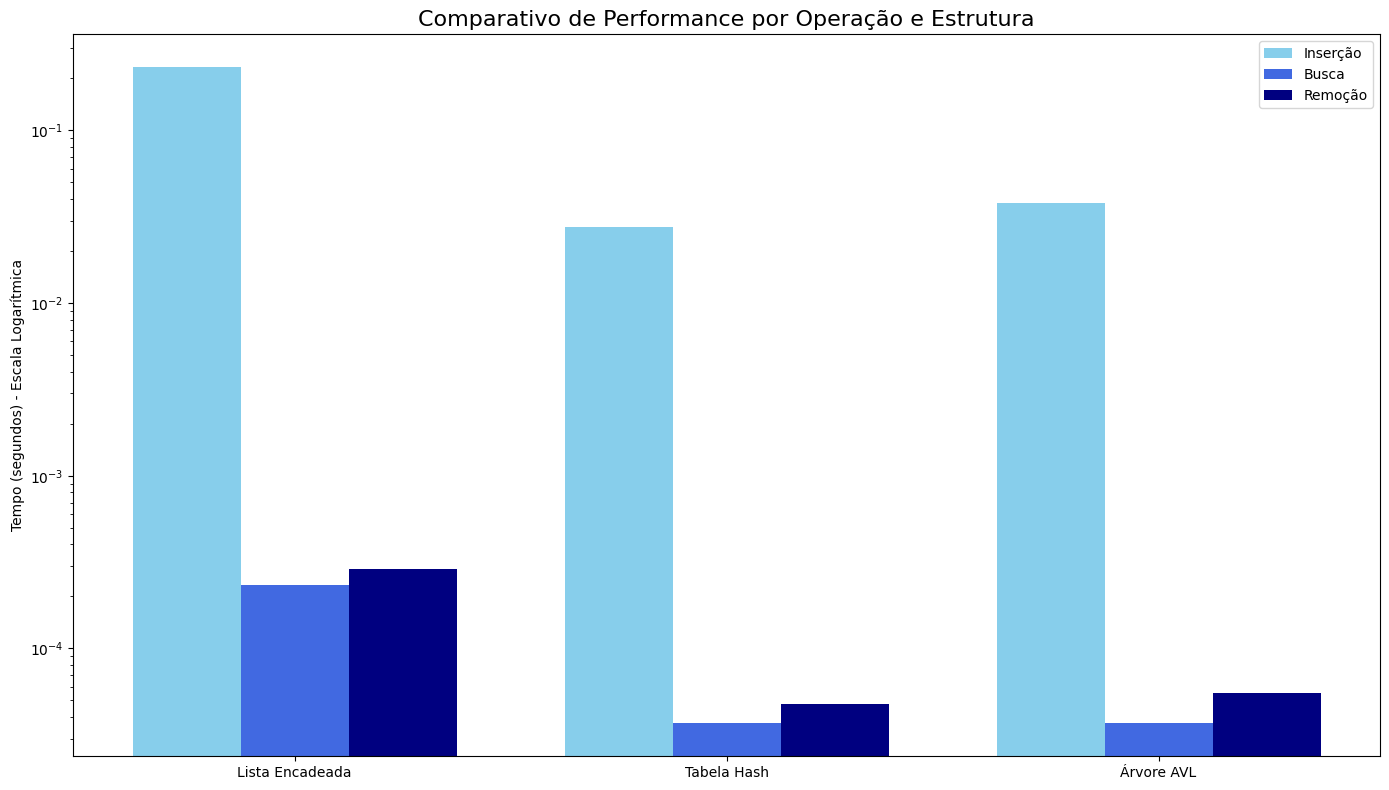

In [9]:
# Célula de Gráfico Agrupado

# Pega os dados da nossa Tabela Mestra
labels = df_final_results.index
insert_times = df_final_results['Inserção (s)']
search_times = df_final_results['Busca (s)']
remove_times = df_final_results['Remoção (s)']

x = np.arange(len(labels))  # As posições dos grupos de barras
width = 0.25  # A largura das barras

fig, ax = plt.subplots(figsize=(14, 8))

# Cria as barras para cada operação, com um pequeno deslocamento no eixo x
rects1 = ax.bar(x - width, insert_times, width, label='Inserção', color='skyblue')
rects2 = ax.bar(x, search_times, width, label='Busca', color='royalblue')
rects3 = ax.bar(x + width, remove_times, width, label='Remoção', color='navy')

# Adiciona títulos, legendas e rótulos
ax.set_ylabel('Tempo (segundos) - Escala Logarítmica')
ax.set_title('Comparativo de Performance por Operação e Estrutura', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Usa escala logarítmica para que as barras muito pequenas (como a da busca na Hash) fiquem visíveis
ax.set_yscale('log')

fig.tight_layout()
plt.show()

Tamanho total do DataFrame: 8763 linhas
Tamanhos de N que serão efetivamente testados: [1000, 2500, 5000, 7500, 8763]

Iniciando análise de escalabilidade... Isso pode demorar alguns minutos.
--- INICIANDO ITERAÇÃO PARA N = 1000 ---
DEBUG: Tamanho real de 'dados_teste': 1000
DEBUG: Índice que estamos tentando acessar ('chave_busca'): 999
--------------------------------------------------
--- INICIANDO ITERAÇÃO PARA N = 2500 ---
DEBUG: Tamanho real de 'dados_teste': 2500
DEBUG: Índice que estamos tentando acessar ('chave_busca'): 2499
--------------------------------------------------
--- INICIANDO ITERAÇÃO PARA N = 5000 ---
DEBUG: Tamanho real de 'dados_teste': 5000
DEBUG: Índice que estamos tentando acessar ('chave_busca'): 4999
--------------------------------------------------
--- INICIANDO ITERAÇÃO PARA N = 7500 ---
DEBUG: Tamanho real de 'dados_teste': 7500
DEBUG: Índice que estamos tentando acessar ('chave_busca'): 7499
--------------------------------------------------
--- INICI

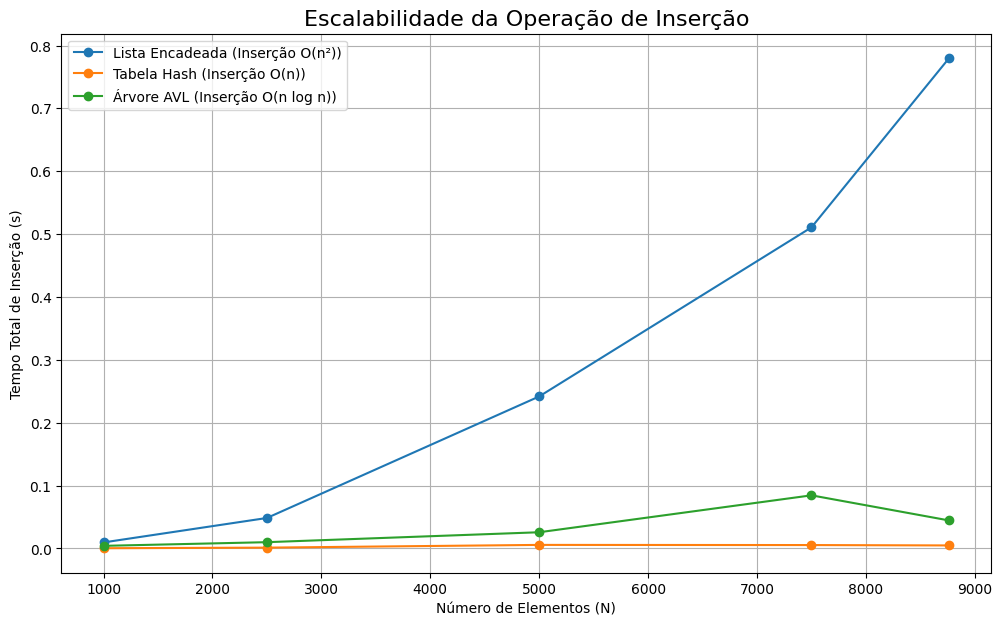

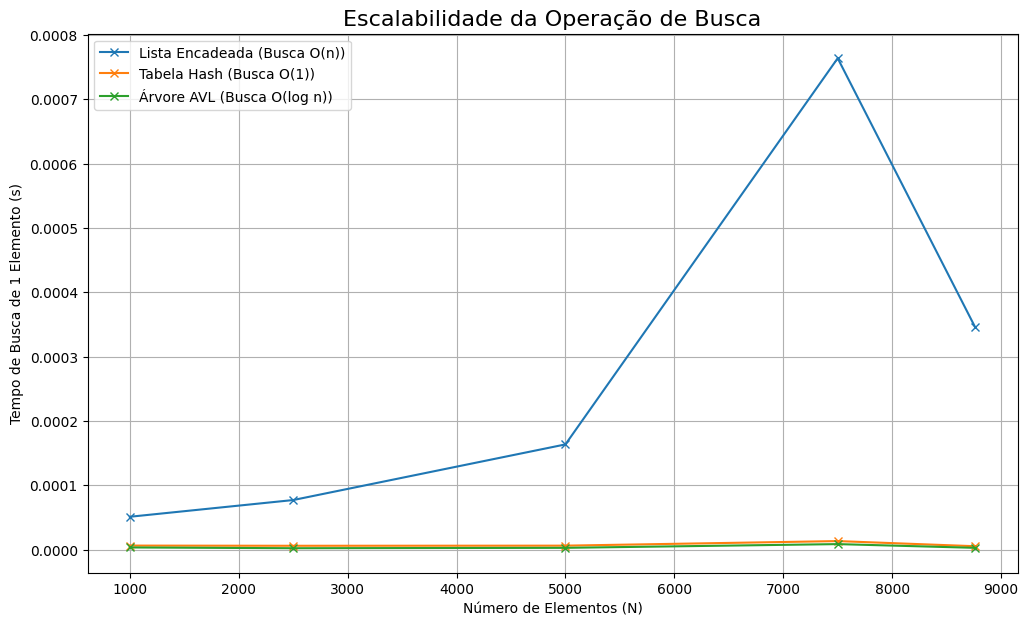

In [10]:
# Célula de Análise de Escalabilidade (MODO DE DEPURAÇÃO)

# --- INÍCIO DA CONFIGURAÇÃO ---
print(f"Tamanho total do DataFrame: {len(df)} linhas")

tamanhos_de_n_sugeridos = [1000, 2500, 5000, 7500, 10000, 15000, 20000] 
tamanhos_de_n_validos = [n for n in tamanhos_de_n_sugeridos if n <= len(df)]
if len(df) not in tamanhos_de_n_validos and len(df) > 0:
    tamanhos_de_n_validos.append(len(df))
tamanhos_de_n_validos.sort()

print(f"Tamanhos de N que serão efetivamente testados: {tamanhos_de_n_validos}\n")
# ----------------------------------------------------------------------------------

resultados_escalabilidade = []

print("Iniciando análise de escalabilidade... Isso pode demorar alguns minutos.")

# Loop principal que roda os benchmarks para cada N
for n in tamanhos_de_n_validos:
    print(f"--- INICIANDO ITERAÇÃO PARA N = {n} ---")
    
    # Prepara os dados
    dados_teste = df[df.columns[0]].head(n)
    chave_busca = n - 1

    # ==================== BLOCO DE DEPURAÇÃO ====================
    tamanho_real_dados_teste = len(dados_teste)
    print(f"DEBUG: Tamanho real de 'dados_teste': {tamanho_real_dados_teste}")
    print(f"DEBUG: Índice que estamos tentando acessar ('chave_busca'): {chave_busca}")
    
    # Adicionamos uma verificação de segurança antes de tentar o acesso
    if chave_busca >= tamanho_real_dados_teste:
        print(f"!!! ALERTA: 'chave_busca' ({chave_busca}) está fora dos limites para 'dados_teste' de tamanho {tamanho_real_dados_teste} !!!")
        print("!!! Pulando esta iteração para evitar o erro. !!!")
        print("-" * 50)
        continue # Pula para a próxima iteração do loop
    # ==========================================================

    valor_busca = dados_teste.iloc[chave_busca]

    # ... O resto do seu código de benchmark continua aqui ...
    # (Copie e cole o restante da sua célula original, medindo os tempos de inserção e busca)
    # --- Mede os tempos de INSERÇÃO para N itens ---
    # Lista Encadeada
    ll = LinkedList()
    start = time.perf_counter()
    for item in dados_teste: ll.insert(item)
    t_ll_ins = time.perf_counter() - start

    # Tabela Hash
    ht = HashTable(size=n*2)
    start = time.perf_counter()
    for i, item in enumerate(dados_teste): ht.insert(key=i, value=item)
    t_ht_ins = time.perf_counter() - start
    
    # Árvore AVL
    avl = AVLTree()
    start = time.perf_counter()
    for item in dados_teste: avl.insert(item)
    t_avl_ins = time.perf_counter() - start

    # --- Mede os tempos de BUSCA para N itens ---
    # Lista Encadeada
    start = time.perf_counter()
    ll.search(valor_busca)
    t_ll_src = time.perf_counter() - start

    # Tabela Hash
    start = time.perf_counter()
    ht.search(chave_busca)
    t_ht_src = time.perf_counter() - start

    # Árvore AVL
    start = time.perf_counter()
    avl.search(valor_busca)
    t_avl_src = time.perf_counter() - start

    # Armazena os resultados desta iteração
    resultados_escalabilidade.append({
        "N": n,
        "LL_Insert": t_ll_ins, "HT_Insert": t_ht_ins, "AVL_Insert": t_avl_ins,
        "LL_Search": t_ll_src, "HT_Search": t_ht_src, "AVL_Search": t_avl_src,
    })
    print("-" * 50)


print("Análise de escalabilidade concluída!")
# Converte os resultados para um DataFrame para facilitar a plotagem
df_escalabilidade = pd.DataFrame(resultados_escalabilidade)

# O restante do seu código de plotagem continua aqui...
# Converte os resultados para um DataFrame para facilitar a plotagem
df_escalabilidade = pd.DataFrame(resultados_escalabilidade)


# --- Plotando os Gráficos de Escalabilidade ---

# Gráfico para Inserção
plt.figure(figsize=(12, 7))
plt.plot(df_escalabilidade["N"], df_escalabilidade["LL_Insert"], marker='o', label='Lista Encadeada (Inserção O(n²))')
plt.plot(df_escalabilidade["N"], df_escalabilidade["HT_Insert"], marker='o', label='Tabela Hash (Inserção O(n))')
plt.plot(df_escalabilidade["N"], df_escalabilidade["AVL_Insert"], marker='o', label='Árvore AVL (Inserção O(n log n))')
plt.xlabel("Número de Elementos (N)")
plt.ylabel("Tempo Total de Inserção (s)")
plt.title("Escalabilidade da Operação de Inserção", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para Busca
plt.figure(figsize=(12, 7))
plt.plot(df_escalabilidade["N"], df_escalabilidade["LL_Search"], marker='x', label='Lista Encadeada (Busca O(n))')
plt.plot(df_escalabilidade["N"], df_escalabilidade["HT_Search"], marker='x', label='Tabela Hash (Busca O(1))')
plt.plot(df_escalabilidade["N"], df_escalabilidade["AVL_Search"], marker='x', label='Árvore AVL (Busca O(log n))')
plt.xlabel("Número de Elementos (N)")
plt.ylabel("Tempo de Busca de 1 Elemento (s)")
plt.title("Escalabilidade da Operação de Busca", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Célula de Benchmark para o Counting Bloom Filter

# 1. Imports e preparação dos dados
from src.estrutura_de_dados.bloom_filter2 import CountingBloomFilter
import pandas as pd
import time
import json
import random

# Supondo que 'df' já foi carregado em uma célula anterior
# Se não, carregue-o aqui: df = pd.read_csv(...)

N_ITEMS = 5000 # Número de itens para o teste
print(f"--- Iniciando Benchmark do CountingBloomFilter com {N_ITEMS} Itens ---")

# Prepara os dados: o Filtro de Bloom funciona bem com strings.
# Vamos converter cada linha do CSV em uma string JSON, como no seu script original.
dados_para_teste = [
    json.dumps(tuple(row)) for row in df.head(N_ITEMS).to_numpy().tolist()
]

# --- 2. Benchmark de Tempo ---
# Parâmetros para o filtro: um tamanho maior reduz falsos positivos
tamanho_filtro = N_ITEMS * 20  # Regra de ouro: ~20x o número de itens
num_hashes = 7               # Um bom número de funções hash

bloom = CountingBloomFilter(size=tamanho_filtro, hash_count=num_hashes)
resultados_bloom = {}

# Inserção
start = time.perf_counter()
for item in dados_para_teste:
    bloom.insert(item)
resultados_bloom["Tempo de Inserção (s)"] = time.perf_counter() - start

# Busca (itens que existem)
start = time.perf_counter()
for item in dados_para_teste:
    bloom.search(item)
resultados_bloom["Tempo de Busca (s)"] = time.perf_counter() - start

# Remoção
start = time.perf_counter()
for item in dados_para_teste:
    bloom.remove(item)
resultados_bloom["Tempo de Remoção (s)"] = time.perf_counter() - start


# --- 3. Benchmark de Métricas Específicas ---

# Uso de Memória
resultados_bloom["Uso de Memória (bytes)"] = bloom.get_memory_usage()

# Taxa de Falsos Positivos (MÉTRICA CRUCIAL)
bloom_fp = CountingBloomFilter(size=tamanho_filtro, hash_count=num_hashes)
for item in dados_para_teste:
    bloom_fp.insert(item)

# Gera itens que definitivamente NÃO estão no filtro
itens_falsos = [json.dumps(f"item_falso_{i}") for i in range(N_ITEMS)]
falsos_positivos = 0
for item in itens_falsos:
    if bloom_fp.search(item): # Se search() retornar True para um item falso...
        falsos_positivos += 1

taxa_fp = falsos_positivos / N_ITEMS
resultados_bloom["Taxa de Falsos Positivos"] = taxa_fp


# --- 4. Exibe o Relatório ---
print("\n--- Relatório de Benchmark do CountingBloomFilter ---")
df_bloom_results = pd.DataFrame.from_dict(resultados_bloom, orient='index', columns=['Valor'])
display(df_bloom_results)

--- Iniciando Benchmark do CountingBloomFilter com 5000 Itens ---

--- Relatório de Benchmark do CountingBloomFilter ---


,Valor
Tempo de Inserção (s),0.057587
Tempo de Busca (s),0.064034
Tempo de Remoção (s),0.129221
Uso de Memória (bytes),800056.000000
Taxa de Falsos Positivos,0.000200


In [12]:
# Célula de Benchmark para o Cuckoo Hashing
from src.estrutura_de_dados.cuckoo_hashing import CuckooHashing

N_ITEMS = 5000
print(f"--- Iniciando Benchmark do CuckooHashing com {N_ITEMS} Itens ---")

# Prepara os dados (chave=índice, valor=idade)
dados_para_teste = df['Age'].head(N_ITEMS).to_dict()

cuckoo = CuckooHashing(size=N_ITEMS) # Começa com um tamanho pequeno para forçar rehashes
resultados_cuckoo = {}

# Inserção
start = time.perf_counter()
for key, value in dados_para_teste.items():
    cuckoo.insert(key, value)
resultados_cuckoo["Tempo de Inserção (s)"] = time.perf_counter() - start
resultados_cuckoo["Número de Rehashes"] = cuckoo.rehash_count

# Busca
start = time.perf_counter()
for key in dados_para_teste.keys():
    cuckoo.search(key)
resultados_cuckoo["Tempo de Busca (s)"] = time.perf_counter() - start

# Memória
resultados_cuckoo["Uso de Memória (bytes)"] = cuckoo.get_memory_usage()

# Exibe o Relatório
print("\n--- Relatório de Benchmark do CuckooHashing ---")
df_cuckoo_results = pd.DataFrame.from_dict(resultados_cuckoo, orient='index', columns=['Valor'])
display(df_cuckoo_results)

--- Iniciando Benchmark do CuckooHashing com 5000 Itens ---

--- Relatório de Benchmark do CuckooHashing ---


,Valor
Tempo de Inserção (s),0.022663
Número de Rehashes,0.000000
Tempo de Busca (s),0.009595
Uso de Memória (bytes),80112.000000


In [13]:
# Célula de Benchmark para a KD-Tree
from src.estrutura_de_dados.kd_tree import KDTree

N_ITEMS = 5000
print(f"--- Iniciando Benchmark da KD-Tree com {N_ITEMS} Itens ---")

# 1. Prepara os dados: Seleciona 2 colunas numéricas (ex: 'Age' e 'Cholesterol')
pontos = df[['Age', 'Cholesterol']].head(N_ITEMS).to_numpy().tolist()
query_point = (50, 250) # Um ponto de exemplo para buscar o vizinho

# --- 2. Benchmark de Construção e Busca ---
resultados_kdtree = {}

# Tempo de Construção (inserção)
start = time.perf_counter()
kdtree = KDTree(pontos)
resultados_kdtree["Tempo de Construção (s)"] = time.perf_counter() - start

# Tempo de Busca do Vizinho Mais Próximo (NN)
start = time.perf_counter()
vizinho_kdtree = kdtree.find_nearest_neighbor(query_point)
resultados_kdtree["Tempo de Busca NN (s)"] = time.perf_counter() - start

# Medição de Memória
memoria_kdtree = kdtree.get_memory_usage()
resultados_kdtree["Uso de Memória (bytes)"] = memoria_kdtree

# --- 3. Comparação com Busca Linear (Ingênua) ---
def busca_linear_nn(point_list, query):
    melhor_ponto = None
    menor_dist_sq = float('inf')
    for p in point_list:
        dist_sq = sum([(c1 - c2) ** 2 for c1, c2 in zip(p, query)])
        if dist_sq < menor_dist_sq:
            menor_dist_sq = dist_sq
            melhor_ponto = p
    return melhor_ponto

start = time.perf_counter()
vizinho_linear = busca_linear_nn(pontos, query_point)
tempo_linear = time.perf_counter() - start
resultados_kdtree["Tempo de Busca Linear (s)"] = tempo_linear

# --- 4. Exibe o Relatório ---
print("\n--- Relatório de Benchmark da KD-Tree ---")
print(f"Ponto de consulta: {query_point}")
print(f"Vizinho encontrado pela KD-Tree: {vizinho_kdtree}")
print(f"Vizinho encontrado pela Busca Linear: {vizinho_linear}")

df_kdtree_results = pd.DataFrame.from_dict(resultados_kdtree, orient='index', columns=['Valor'])
display(df_kdtree_results)

ganho = tempo_linear / resultados_kdtree["Tempo de Busca NN (s)"]
print(f"\nA busca na KD-Tree foi {ganho:.2f} vezes mais rápida que a busca linear.")

--- Iniciando Benchmark da KD-Tree com 5000 Itens ---

--- Relatório de Benchmark da KD-Tree ---
Ponto de consulta: (50, 250)
Vizinho encontrado pela KD-Tree: [52, 250]
Vizinho encontrado pela Busca Linear: [52, 250]


,Valor
Tempo de Construção (s),0.013182
Tempo de Busca NN (s),0.000108
Uso de Memória (bytes),240000.000000
Tempo de Busca Linear (s),0.004058



A busca na KD-Tree foi 37.47 vezes mais rápida que a busca linear.


In [14]:
# Célula Final: Geração e Salvamento de Todos os Relatórios de Benchmark

# --- 1. Configuração do Benchmark ---
N_ITEMS = 5000 # Número de itens para usar nos testes
print(f"--- Iniciando Benchmark Completo com {N_ITEMS} Itens ---")

# Prepara os diferentes tipos de dados que vamos precisar (supondo que 'df' está carregado)
df_benchmark = RECURSOS_CARREGADOS["df"] 
dados_numericos = df_benchmark['Age'].head(N_ITEMS).tolist()
dados_chave_valor = df_benchmark['Age'].head(N_ITEMS).to_dict()
dados_strings_json = [json.dumps(tuple(row)) for row in df_benchmark.head(N_ITEMS).to_numpy().tolist()]
dados_pontos_2d = df_benchmark[['Age', 'Cholesterol']].head(N_ITEMS).to_numpy().tolist()

# Itens para buscar/remover
query_point_2d = (50, 250)
item_busca_final_numerico = dados_numericos[-1]
ponto_para_remover_kdtree = dados_pontos_2d[-1]


# --- 2. Execução dos Benchmarks e Coleta de Dados ---
tempos_insercao, tempos_busca, tempos_remocao, usos_memoria, metricas_especiais = {}, {}, {}, {}, {}

# Lista Encadeada Otimizada
print("Benchmarking: Lista Encadeada Otimizada...")
ll = LinkedListOptimized()
start = time.perf_counter(); [ll.insert(item) for item in dados_numericos]; tempos_insercao["Lista Encadeada"] = time.perf_counter() - start
start = time.perf_counter(); ll.search(item_busca_final_numerico); tempos_busca["Lista Encadeada"] = time.perf_counter() - start
start = time.perf_counter(); ll.remove(item_busca_final_numerico); tempos_remocao["Lista Encadeada"] = time.perf_counter() - start
usos_memoria["Lista Encadeada"] = ll.get_memory_usage()

# Tabela Hash
print("Benchmarking: Tabela Hash...")
ht = HashTable(size=N_ITEMS*2)
start = time.perf_counter(); [ht.insert(k, v) for k, v in dados_chave_valor.items()]; tempos_insercao["Tabela Hash"] = time.perf_counter() - start
start = time.perf_counter(); ht.search(N_ITEMS-1); tempos_busca["Tabela Hash"] = time.perf_counter() - start
start = time.perf_counter(); ht.remove(N_ITEMS-1); tempos_remocao["Tabela Hash"] = time.perf_counter() - start
usos_memoria["Tabela Hash"] = ht.get_memory_usage()

# Árvore AVL
print("Benchmarking: Árvore AVL...")
avl = AVLTree()
start = time.perf_counter(); [avl.insert(item) for item in dados_numericos]; tempos_insercao["Árvore AVL"] = time.perf_counter() - start
start = time.perf_counter(); avl.search(item_busca_final_numerico); tempos_busca["Árvore AVL"] = time.perf_counter() - start
start = time.perf_counter(); avl.remove(item_busca_final_numerico); tempos_remocao["Árvore AVL"] = time.perf_counter() - start
usos_memoria["Árvore AVL"] = avl.get_memory_usage()

# Cuckoo Hashing
print("Benchmarking: Cuckoo Hashing...")
cuckoo = CuckooHashing(size=N_ITEMS)
start = time.perf_counter(); [cuckoo.insert(k, v) for k, v in dados_chave_valor.items()]; tempos_insercao["Cuckoo Hashing"] = time.perf_counter() - start
start = time.perf_counter(); cuckoo.search(N_ITEMS-1); tempos_busca["Cuckoo Hashing"] = time.perf_counter() - start
start = time.perf_counter(); cuckoo.remove(N_ITEMS-1); tempos_remocao["Cuckoo Hashing"] = time.perf_counter() - start
usos_memoria["Cuckoo Hashing"] = cuckoo.get_memory_usage()
metricas_especiais["Cuckoo Hashing"] = {"Rehashes": cuckoo.rehash_count}

# Counting Bloom Filter
print("Benchmarking: Counting Bloom Filter...")
bloom = CountingBloomFilter(size=N_ITEMS*20, hash_count=7)
start = time.perf_counter(); [bloom.insert(item) for item in dados_strings_json]; tempos_insercao["Bloom Filter"] = time.perf_counter() - start
start = time.perf_counter(); [bloom.search(item) for item in dados_strings_json]; tempos_busca["Bloom Filter"] = time.perf_counter() - start
start = time.perf_counter(); [bloom.remove(item) for item in dados_strings_json]; tempos_remocao["Bloom Filter"] = time.perf_counter() - start
usos_memoria["Bloom Filter"] = bloom.get_memory_usage()
itens_falsos = [f"item_falso_{i}" for i in range(N_ITEMS)]; fp_count = sum(1 for item in itens_falsos if bloom.search(item))
metricas_especiais["Bloom Filter"] = {"Taxa Falsos Positivos": f"{(fp_count/N_ITEMS):.2%}"}

# KD-Tree
print("Benchmarking: KD-Tree...")
start = time.perf_counter(); kdtree = KDTree(dados_pontos_2d); tempos_insercao["KD-Tree"] = time.perf_counter() - start
start = time.perf_counter(); kdtree.find_nearest_neighbor(query_point_2d); tempos_busca["KD-Tree"] = time.perf_counter() - start
# --- MUDANÇA AQUI ---
start = time.perf_counter(); kdtree.remove(ponto_para_remover_kdtree); tempos_remocao["KD-Tree"] = time.perf_counter() - start
# --------------------
usos_memoria["KD-Tree"] = kdtree.get_memory_usage()
metricas_especiais["KD-Tree"] = {"Operação de Busca": "Vizinho Mais Próximo", "Tipo de Remoção": "Preguiçosa (Lazy)"}


# --- 3. Criação dos DataFrames de Resultado ---
print("\nGerando tabelas de resultados...")
def criar_df_tempo(dicionario_tempos, nome_baseline="Lista Encadeada"):
    df = pd.DataFrame.from_dict(dicionario_tempos, orient='index', columns=['Tempo (s)'])
    if nome_baseline in df.index:
        baseline_time = df.loc[nome_baseline, 'Tempo (s)']
        df['Vezes mais rápido (vs. Baseline)'] = baseline_time / df['Tempo (s)']
    return df

df_insercao = criar_df_tempo(tempos_insercao); df_busca = criar_df_tempo(tempos_busca)
df_remocao = criar_df_tempo(tempos_remocao); df_memoria = pd.DataFrame.from_dict(usos_memoria, orient='index', columns=['Memória (bytes)']).sort_values(by='Memória (bytes)')

print("\n--- Tabela de Inserção ---"); display(df_insercao.round(6))
print("\n--- Tabela de Busca ---"); display(df_busca.round(6))
print("\n--- Tabela de Remoção ---"); display(df_remocao.round(6))
print("\n--- Tabela de Uso de Memória ---"); display(df_memoria)


# --- 4. Salvando os Resultados em um Arquivo Excel ---
output_dir = '../resultados'
os.makedirs(output_dir, exist_ok=True)
excel_path = os.path.join(output_dir, 'relatorio_completo_benchmarks.xlsx')

with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    print(f"\nSalvando resultados em '{excel_path}'...")
    df_insercao.to_excel(writer, sheet_name='Tempo_Insercao')
    df_busca.to_excel(writer, sheet_name='Tempo_Busca')
    df_remocao.to_excel(writer, sheet_name='Tempo_Remocao')
    df_memoria.to_excel(writer, sheet_name='Uso_Memoria')
    
print("\n✅ Relatório completo salvo com sucesso!")

--- Iniciando Benchmark Completo com 5000 Itens ---
Benchmarking: Lista Encadeada Otimizada...
Benchmarking: Tabela Hash...
Benchmarking: Árvore AVL...
Benchmarking: Cuckoo Hashing...
Benchmarking: Counting Bloom Filter...
Benchmarking: KD-Tree...

Gerando tabelas de resultados...

--- Tabela de Inserção ---


,Tempo (s),Vezes mais rápido (vs. Baseline)
Lista Encadeada,0.001036,1.000000
Tabela Hash,0.001272,0.814224
Árvore AVL,0.021701,0.047744
Cuckoo Hashing,0.016051,0.064550
Bloom Filter,0.081771,0.012671
KD-Tree,0.026871,0.038558



--- Tabela de Busca ---


,Tempo (s),Vezes mais rápido (vs. Baseline)
Lista Encadeada,0.000041,1.000000
Tabela Hash,0.000034,1.211309
Árvore AVL,0.000037,1.115068
Cuckoo Hashing,0.000044,0.935632
Bloom Filter,0.126520,0.000322
KD-Tree,0.000100,0.407000



--- Tabela de Remoção ---


,Tempo (s),Vezes mais rápido (vs. Baseline)
Lista Encadeada,0.000031,1.000000
Tabela Hash,0.000031,1.003225
Árvore AVL,0.000043,0.721578
Cuckoo Hashing,0.000037,0.840540
Bloom Filter,0.229648,0.000135
KD-Tree,0.000053,0.581308



--- Tabela de Uso de Memória ---


,Memória (bytes)
Cuckoo Hashing,80112
Árvore AVL,239952
Lista Encadeada,240000
KD-Tree,240000
Bloom Filter,800056
Tabela Hash,1085120



Salvando resultados em '../resultados\relatorio_completo_benchmarks.xlsx'...

✅ Relatório completo salvo com sucesso!


In [15]:
# Célula de Teste de Salvamento em Excel

print("--- Testando o salvamento em Excel de forma isolada ---")
try:
    # Cria um DataFrame de teste muito simples
    df_teste_simples = pd.DataFrame({
        'Letras': ['A', 'B', 'C'],
        'Números': [1, 2, 3]
    })
    
    # Define o caminho do arquivo de teste
    caminho_teste = os.path.join('../resultados', 'teste_simples.xlsx')
    
    # Tenta salvar
    df_teste_simples.to_excel(caminho_teste, index=False, engine='openpyxl')
    
    print(f"✅ Arquivo 'teste_simples.xlsx' salvo com sucesso na pasta 'resultados'.")
    print("Por favor, tente abrir este arquivo diretamente no Excel.")
    
except Exception as e:
    print(f"❌ Ocorreu um erro ao salvar o arquivo de teste: {e}")

--- Testando o salvamento em Excel de forma isolada ---
✅ Arquivo 'teste_simples.xlsx' salvo com sucesso na pasta 'resultados'.
Por favor, tente abrir este arquivo diretamente no Excel.
